In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier




from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
df = pd.read_csv(r"C:\Users\shreeyash\Downloads\Train_data.csv\Train_data.csv")

In [36]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [38]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [39]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [40]:
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [41]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [42]:
DF=df.drop(columns=[ 'land', 'hot', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login'])

In [43]:
DF

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,1,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,1,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,1,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [44]:
DF['protocol_type'].value_counts()

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

In [45]:
DF['protocol_type'].replace({'tcp':0,'udp':1,'icmp':2},inplace=True)

<Axes: ylabel='proportion'>

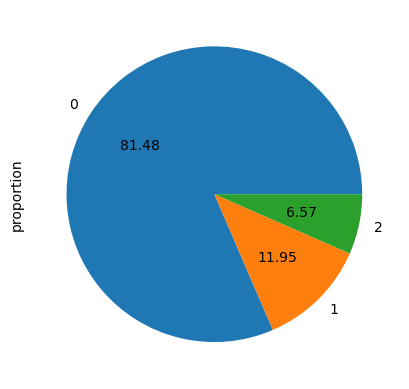

In [46]:
DF['protocol_type'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')

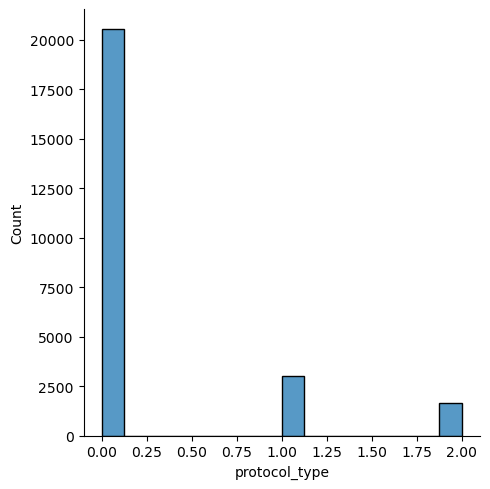

In [47]:
sns.displot(DF['protocol_type'])

In [48]:
DF['service'].value_counts()

service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64

In [49]:
label_encoder = LabelEncoder()
def lab(df1):
    for col in df1.columns:
        if df1[col].dtype == 'object':
            df1[col] = label_encoder.fit_transform(df1[col])
lab(DF)

In [50]:
DF['service'].value_counts()

service
22    8003
46    4351
11    1820
51    1449
19    1396
      ... 
60       4
47       3
42       3
58       2
24       1
Name: count, Length: 66, dtype: int64

<Axes: ylabel='proportion'>

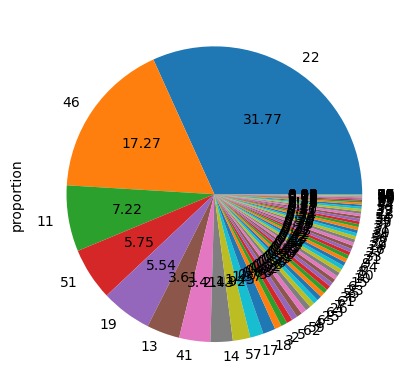

In [51]:
DF['service'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')

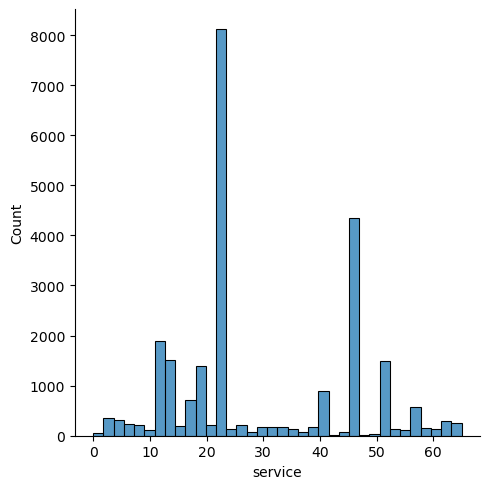

In [52]:
sns.displot(DF['service'])

In [53]:
DF['flag'].value_counts()

flag
9     14973
5      7009
1      2216
4       497
2       304
6        88
10       43
3        21
7        21
8        15
0         5
Name: count, dtype: int64

In [54]:
DF['flag'].replace({'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO ':4,'S1':5,'SH':6,'RSTOS0':7,'S2':8,'S3':9,'OTH':10},inplace=True)

<Axes: ylabel='proportion'>

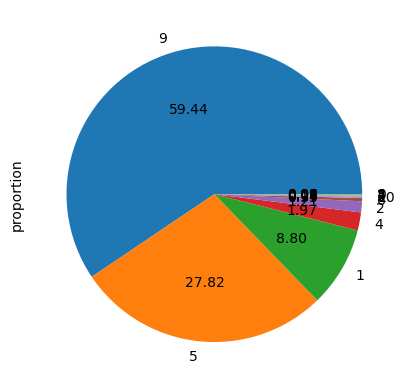

In [55]:
DF['flag'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')

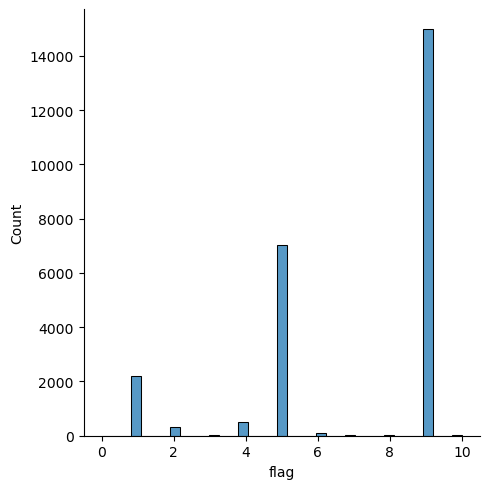

In [56]:
sns.displot(DF['flag'])

In [57]:
DF['class'].value_counts()

class
1    13449
0    11743
Name: count, dtype: int64

In [58]:
DF['class'].replace({'normal':0,'anomaly':1},inplace=True)

<Axes: ylabel='proportion'>

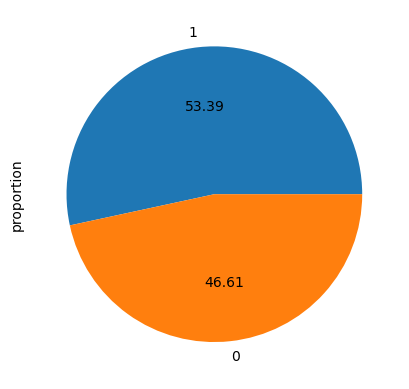

In [59]:
DF['class'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')

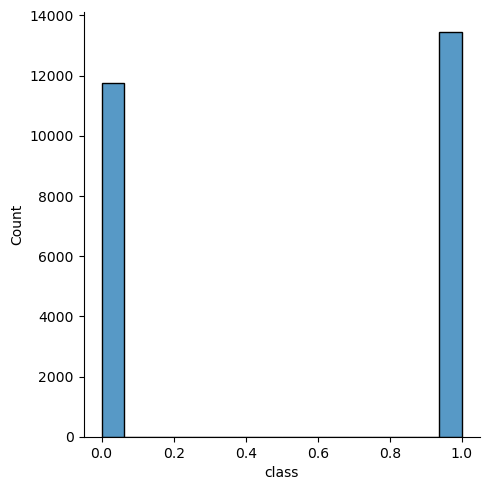

In [60]:
sns.displot(DF['class'])

In [61]:
DF.corr(numeric_only=True)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,-0.012083,0.101301,-0.066634,0.084864,0.013258,-0.010358,-0.000486,0.011108,-0.063703,...,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,-0.050901
protocol_type,-0.012083,1.000000,-0.246389,0.334348,-0.004442,-0.017287,0.130640,-0.002797,-0.011642,-0.358593,...,0.067524,0.206310,-0.016446,0.566059,0.370650,-0.279933,-0.278556,-0.134759,-0.166184,-0.048654
service,0.101301,-0.246389,1.000000,-0.295491,0.008554,-0.013782,0.088169,0.011325,0.029601,-0.138824,...,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865,-0.270494
flag,-0.066634,0.334348,-0.295491,1.000000,-0.006599,0.027606,0.068693,0.004744,-0.010920,0.587882,...,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075,0.651309
src_bytes,0.084864,-0.004442,0.008554,-0.006599,1.000000,0.003611,-0.000916,-0.000062,-0.000260,-0.002040,...,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,-0.005743
dst_bytes,0.013258,-0.017287,-0.013782,0.027606,0.003611,1.000000,-0.003586,0.000345,0.005197,0.012704,...,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,0.010949
wrong_fragment,-0.010358,0.130640,0.088169,0.068693,-0.000916,-0.003586,1.000000,-0.000575,-0.002392,-0.073674,...,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,-0.097625
urgent,-0.000486,-0.002797,0.011325,0.004744,-0.000062,0.000345,-0.000575,1.000000,-0.000165,0.007801,...,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358,-0.006743
num_failed_logins,0.011108,-0.011642,0.029601,-0.010920,-0.000260,0.005197,-0.002392,-0.000165,1.000000,-0.006872,...,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693,-0.000028
logged_in,-0.063703,-0.358593,-0.138824,0.587882,-0.002040,0.012704,-0.073674,0.007801,-0.006872,1.000000,...,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507,0.688084


In [62]:
X = DF.drop('class', axis=1)
y = DF['class']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [64]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(20153, 31) (5039, 31)
(20153,) (5039,)


In [65]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

In [74]:
r_sqr = r2_score(y_test, y_pred)
print("r_square:",r_sqr)
adj_r2 = (1 - ((1 - r_sqr)*(len(X_test) -1))/(len(X_test)- len(X_test.columns)-1))
print("adj_r2square:",adj_r2)

r_square: 0.8300238408659465
adj_r2square: 0.828971462009714


In [72]:
accuracy_score=model.score(X_train,y_train)
print('LinearRegression Accuracy:',accuracy_score)

LinearRegression Accuracy: 0.8273304148856968


LogisticRegression

In [ ]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
precision = precision_score(y_test, y_pred)
print(f'precision.score: {precision}')

precision.score: 0.8872236792806294


In [ ]:
accuracy_lr = lr.score(X_test, y_test)
print(f'Accuracy  LogisticRegression.score: {accuracy_lr}')

Accuracy  LogisticRegression.score: 0.8733875769001787


KNN

In [76]:


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:

y_pred=knn.predict(X_test)
accuracy =accuracy_score(y_test,y_pred)

In [79]:
precision = precision_score(y_test, y_pred)
print('Precision score: ',precision)
accuracy_knn = knn.score(X_test, y_test)
print(f'knn Accuracy.score: {accuracy_knn:.2f}')

Precision score:  0.9892592592592593
knn Accuracy.score: 0.99
